In [43]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Downloads")

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [166]:
ds=pd.read_csv("GBP_SGD Historical Data.csv")

In [167]:
ds.tail()

,Date,Price
468,01 February 2020,1.7865
469,01 March 2020,1.7658
470,01 April 2020,1.7771
471,01 May 2020,1.7429
472,01 June 2020,1.7501


In [120]:
ds.head()

,Date,Price
0,01 February 1971,2.4160
1,01 March 1971,2.4168
2,01 April 1971,2.4193
3,01 May 1971,2.4178
4,01 June 1971,2.4196


In [168]:
ds['Date']=pd.to_datetime(ds['Date'])

In [169]:
ds.head()

,Date,Price
0,1981-02-01,4.6331
1,1981-03-01,4.6884
2,1981-04-01,4.5474
3,1981-05-01,4.4638
4,1981-06-01,4.1327


In [170]:
ds.set_index('Date', inplace=True)

In [171]:
ds.head()

,Price
Date,
1981-02-01,4.6331
1981-03-01,4.6884
1981-04-01,4.5474
1981-05-01,4.4638
1981-06-01,4.1327


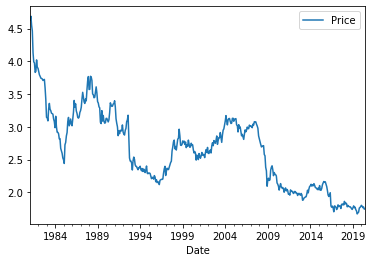

In [172]:
ds.plot()

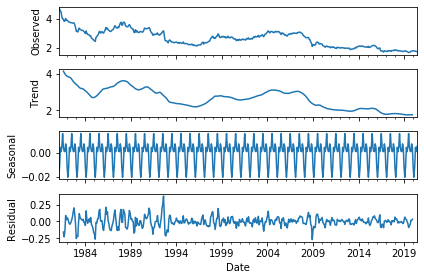

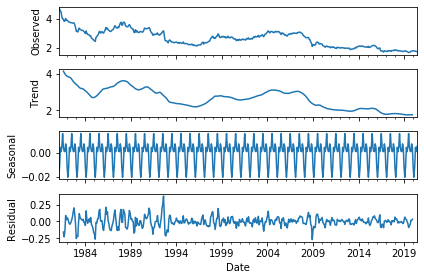

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(ds['Price'], freq=12)  
decomp.plot()

In [174]:
from statsmodels.tsa.stattools import adfuller
adfuller(ds['Price'])

(-3.2180217899768073,
 0.018964921229521665,
 1,
 471,
 {'1%': -3.444310291143469,
  '5%': -2.867695986993458,
  '10%': -2.5700489042602586},
 -1120.0590564036213)

In [175]:
def adf_chec(time_series):
    result=adfuller(time_series)
    print("Augmented Dickey fuller test")
    labels=['ADF Test Statistic', 'P-value', '#Lags', 'No of obs.']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, timeseries is stationery')
    else: 
        print('Weak evidence against null hypothesis, timeseries is non-stationery')

In [176]:
adf_chec(ds['Price'])

Augmented Dickey fuller test
ADF Test Statistic:-3.2180217899768073
P-value:0.018964921229521665
#Lags:1
No of obs.:471
Strong evidence against null hypothesis, timeseries is stationery


In [177]:
ds['Price First Diff']=ds['Price']-ds['Price'].shift(1)  

In [178]:
ds.head()

,Price,Price First Diff
Date,,
1981-02-01,4.6331,NaN
1981-03-01,4.6884,0.0553
1981-04-01,4.5474,-0.1410
1981-05-01,4.4638,-0.0836
1981-06-01,4.1327,-0.3311


In [179]:
adf_chec(ds['Price First Diff'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-19.728733743082433
P-value:0.0
#Lags:0
No of obs.:471
Strong evidence against null hypothesis, timeseries is stationery


In [133]:
#p=0;d=1;q=0

In [180]:
ds['Seasonal Difference']=ds['Price']-ds['Price'].shift(12)  

In [181]:
ds.head()

,Price,Price First Diff,Seasonal Difference
Date,,,
1981-02-01,4.6331,NaN,NaN
1981-03-01,4.6884,0.0553,NaN
1981-04-01,4.5474,-0.1410,NaN
1981-05-01,4.4638,-0.0836,NaN
1981-06-01,4.1327,-0.3311,NaN


In [182]:
adf_chec(ds['Seasonal Difference'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-4.1945065054293975
P-value:0.0006731514547921491
#Lags:12
No of obs.:448
Strong evidence against null hypothesis, timeseries is stationery


In [137]:
#d=1, D=0

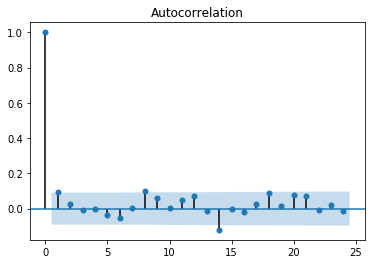

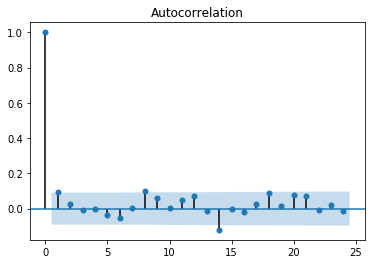

In [183]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ds['Price First Diff'].dropna(), lags=24)

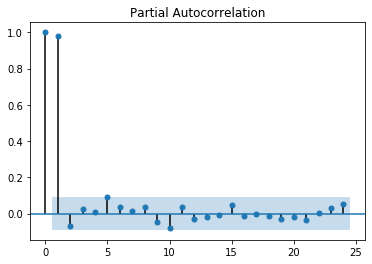

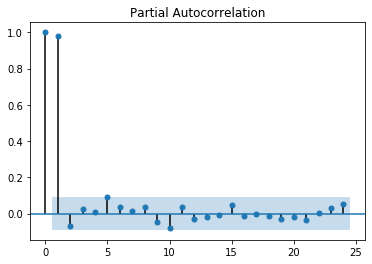

In [184]:
#q=1
plot_pacf(ds['Price'].dropna(), lags=24)
#p=1

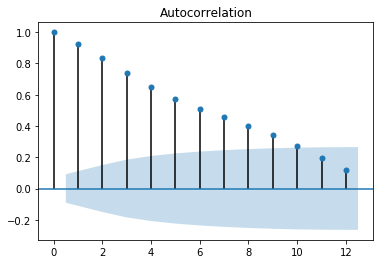

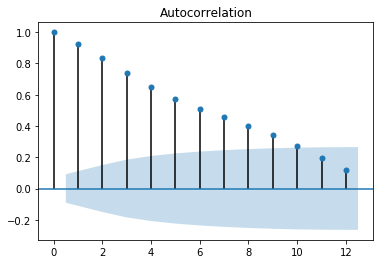

In [185]:
plot_acf(ds['Seasonal Difference'].dropna(), lags=12) #Q=6

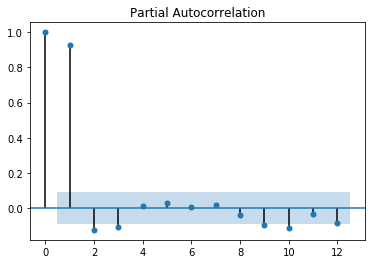

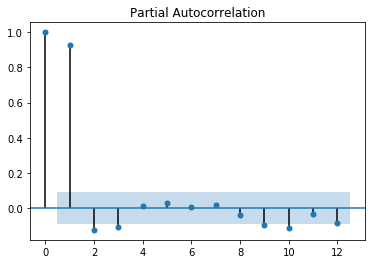

In [186]:
plot_pacf(ds['Seasonal Difference'].dropna(), lags=12) #P=1

In [142]:
#Finally,       AR  I  MA
#      TREND :  1   1  1

#SEASONALITY :  1  0   6


In [254]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ds['Price'],order=(2,2,2), seasonal_order=(2,1,2,12))
results=model.fit()


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


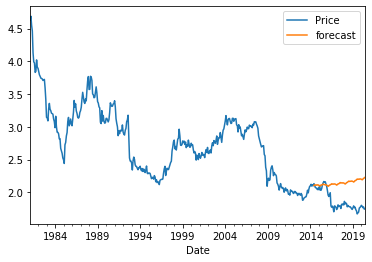

In [255]:
ds['forecast']=results.predict(start=400, end=472, dynamic=True)
ds[['Price','forecast']].plot()

In [267]:
from pandas.tseries.offsets import DateOffset
future_dates=[ds.index[-1]+ DateOffset(months=x) for x in range(0,62)]

In [268]:
future_dates_df_1=pd.DataFrame(index=future_dates[1:], columns=ds.columns)
future_df_1=pd.concat([ds,future_dates_df_1])

In [269]:
future_dates_df_1

,Price,Price First Diff,Seasonal Difference,forecast
2020-07-01,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,NaN
2020-12-01,NaN,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN


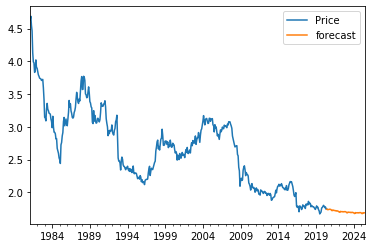

In [270]:
future_df_1['forecast']=results.predict(start=472, end=2312, dynamic=True)
future_df_1[['Price','forecast']].plot()

In [271]:
future_df_1.tail(-472)

,Price,Price First Diff,Seasonal Difference,forecast
2020-06-01,1.7501,0.0072,0.0328,1.741214
2020-07-01,NaN,NaN,NaN,1.738627
2020-08-01,NaN,NaN,NaN,1.733610
2020-09-01,NaN,NaN,NaN,1.738648
2020-10-01,NaN,NaN,NaN,1.739880
2020-11-01,NaN,NaN,NaN,1.743384
2020-12-01,NaN,NaN,NaN,1.739275
2021-01-01,NaN,NaN,NaN,1.736159
2021-02-01,NaN,NaN,NaN,1.722196
2021-03-01,NaN,NaN,NaN,1.720227


In [272]:
future_df_2=future_df_1.drop(['Price','Price First Diff','Seasonal Difference'],axis=1)

In [273]:
future_df_2=future_df_2.tail(-472)

In [274]:
future_df_2.to_excel(r'C:\Users\Adhvaidh\Desktop\12-06 pred\GBP SGD Prediction 17-06.xlsx')